<a href="https://colab.research.google.com/github/LUCASDNORONHA/exploracao-dados-indigenas-2010-2022/blob/main/Projeto_de_Analise_de_Dados_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- Cabeçalho -->
<br />
<p align="center">

  <h3 align="center">Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação – Brasil – 2010/2022</h3>
</p>

### Carregando Dependências

Configurando o ambiente para análise de dados com as principais bibliotecas da stack:

- **Pandas** – manipulação e análise de dados tabulares  
- **NumPy** – suporte a operações numéricas e vetoriais de alto desempenho  
- **Matplotlib** – criação de visualizações e gráficos personalizados


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregando Base de Dados e Tratando os Dados


In [19]:
db = pd.read_excel("../data/raw/indigenas_2010_2022.xlsx")

### A Base de Dados Contém Colunas em Múltiplos Níveis

A estrutura de colunas em múltiplos níveis pode causar inconsistências no carregamento dos dados com o **Pandas**, exigindo tratamento adicional para garantir a correta interpretação e manipulação do DataFrame.


In [28]:
db.sample(5)

,Localidade,Indígenas 2010 Total,Indígenas 2010 Urbano,Indígenas 2010 Rural,Indígenas 2010 TI Total,Indígenas 2010 TI Urbano,Indígenas 2010 TI Rural,Indígenas 2010 Fora TI Total,Indígenas 2010 Fora TI Urbano,Indígenas 2010 Fora TI Rural,...,% Indígenas 2010 TI Urbano,% Indígenas 2010 TI Rural,% Indígenas 2010 Fora TI Urbano,% Indígenas 2010 Fora TI Rural,% Indígenas 2022 Urbano,% Indígenas 2022 Rural,% Indígenas 2022 TI Urbano,% Indígenas 2022 TI Rural,% Indígenas 2022 Fora TI Urbano,% Indígenas 2022 Fora TI Rural
8,NaN,NaN,NaN,NaN,Em Terras Indígenas,NaN,NaN,Fora Terras Indígenas,NaN,NaN,...,Em Terras Indígenas,NaN,Fora Terras Indígenas,NaN,NaN,NaN,Em Terras Indígenas,NaN,Fora Terras Indígenas,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Rondônia,13076,2906,10170,9217,-,9217,3859,2906,953,...,-,100,75.304483,24.695517,38.276743,61.723257,-,100,84.128469,15.871531
9,NaN,NaN,NaN,NaN,Total,Situação do domicílio,NaN,Total,Situação do domicílio,NaN,...,Situação do domicílio,NaN,Situação do domicílio,NaN,NaN,NaN,Situação do domicílio,NaN,Situação do domicílio,NaN
18,Amapá,7411,1360,6051,5956,-,5956,1455,1360,95,...,-,100,93.47079,6.52921,25.224987,74.775013,-,100,82.131571,17.868429


### Ajuste dos Nomes das Colunas

Os nomes originais das colunas da base de dados estavam organizados em múltiplos níveis de cabeçalho, herdando a estrutura da planilha de origem (formato de tabela com hierarquias de títulos). Esse formato dificultava o carregamento adequado dos dados no pandas, já que os nomes das colunas não estavam em um único nível, impedindo a correta identificação e manipulação dos campos.

Para resolver esse problema, realizamos a **normalização dos nomes das colunas**, transformando a estrutura em um **nível único de cabeçalho**. Cada coluna agora possui um nome claro, direto e padronizado, mantendo sua identidade e significado, porém com títulos mais enxutos e apropriados para análise em Python/pandas.

Esse processo permitiu a leitura correta do DataFrame e tornou viável a execução de análises exploratórias, cruzamentos e visualizações a partir de um esquema de dados limpo e funcional.


In [21]:
ajustar_nomes_colunas = [
    'Localidade',
    'Indígenas 2010 Total',
    'Indígenas 2010 Urbano',
    'Indígenas 2010 Rural',
    'Indígenas 2010 TI Total',
    'Indígenas 2010 TI Urbano',
    'Indígenas 2010 TI Rural',
    'Indígenas 2010 Fora TI Total',
    'Indígenas 2010 Fora TI Urbano',
    'Indígenas 2010 Fora TI Rural',
    'Indígenas 2022 Total',
    'Indígenas 2022 Urbano',
    'Indígenas 2022 Rural',
    'Indígenas 2022 TI Total',
    'Indígenas 2022 TI Urbano',
    'Indígenas 2022 TI Rural',
    'Indígenas 2022 Fora TI Total',
    'Indígenas 2022 Fora TI Urbano',
    'Indígenas 2022 Fora TI Rural',
    '% Indígenas 2010 Urbano',
    '% Indígenas 2010 Rural',
    '% Indígenas 2010 TI Urbano',
    '% Indígenas 2010 TI Rural',
    '% Indígenas 2010 Fora TI Urbano',
    '% Indígenas 2010 Fora TI Rural',
    '% Indígenas 2022 Urbano',
    '% Indígenas 2022 Rural',
    '% Indígenas 2022 TI Urbano',
    '% Indígenas 2022 TI Rural',
    '% Indígenas 2022 Fora TI Urbano',
    '% Indígenas 2022 Fora TI Rural'
]

db.columns = ajustar_nomes_colunas

### Dicionário de Variáveis – População Indígena (2010 e 2022)

| Coluna                                | Descrição |
|---------------------------------------|-----------|
| **Localidade**                                | Unidade da Federação (Estado ou Região do Brasil) e o estado Brasileiro. |
| **Indígenas 2010 Total**              | Total de pessoas indígenas em 2010, considerando todos os domicílios. |
| **Indígenas 2010 Urbano**             | Número de indígenas em domicílios localizados em áreas urbanas em 2010. |
| **Indígenas 2010 Rural**              | Número de indígenas em domicílios localizados em áreas rurais em 2010. |
| **Indígenas 2010 TI Total**           | Total de indígenas residentes em Terras Indígenas (TIs) em 2010. |
| **Indígenas 2010 TI Urbano**          | Indígenas em áreas urbanas dentro de Terras Indígenas em 2010. |
| **Indígenas 2010 TI Rural**           | Indígenas em áreas rurais dentro de Terras Indígenas em 2010. |
| **Indígenas 2010 Fora TI Total**      | Total de indígenas fora de Terras Indígenas em 2010. |
| **Indígenas 2010 Fora TI Urbano**     | Indígenas fora de TIs e em áreas urbanas em 2010. |
| **Indígenas 2010 Fora TI Rural**      | Indígenas fora de TIs e em áreas rurais em 2010. |
| **Indígenas 2022 Total**              | Total de pessoas indígenas em 2022, considerando todos os domicílios. |
| **Indígenas 2022 Urbano**             | Número de indígenas em áreas urbanas em 2022. |
| **Indígenas 2022 Rural**              | Número de indígenas em áreas rurais em 2022. |
| **Indígenas 2022 TI Total**           | Total de indígenas residentes em Terras Indígenas em 2022. |
| **Indígenas 2022 TI Urbano**          | Indígenas em áreas urbanas dentro de TIs em 2022. |
| **Indígenas 2022 TI Rural**           | Indígenas em áreas rurais dentro de TIs em 2022. |
| **Indígenas 2022 Fora TI Total**      | Total de indígenas fora de Terras Indígenas em 2022. |
| **Indígenas 2022 Fora TI Urbano**     | Indígenas fora de TIs e em áreas urbanas em 2022. |
| **Indígenas 2022 Fora TI Rural**      | Indígenas fora de TIs e em áreas rurais em 2022. |
| **% Indígenas 2010 Urbano**           | Percentual da população indígena em áreas urbanas em 2010. |
| **% Indígenas 2010 Rural**            | Percentual da população indígena em áreas rurais em 2010. |
| **% Indígenas 2010 TI Urbano**        | Percentual de indígenas em áreas urbanas dentro de TIs em 2010. |
| **% Indígenas 2010 TI Rural**         | Percentual de indígenas em áreas rurais dentro de TIs em 2010. |
| **% Indígenas 2010 Fora TI Urbano**   | Percentual de indígenas fora de TIs em áreas urbanas em 2010. |
| **% Indígenas 2010 Fora TI Rural**    | Percentual de indígenas fora de TIs em áreas rurais em 2010. |
| **% Indígenas 2022 Urbano**           | Percentual da população indígena em áreas urbanas em 2022. |
| **% Indígenas 2022 Rural**            | Percentual da população indígena em áreas rurais em 2022. |
| **% Indígenas 2022 TI Urbano**        | Percentual de indígenas em áreas urbanas dentro de TIs em 2022. |
| **% Indígenas 2022 TI Rural**         | Percentual de indígenas em áreas rurais dentro de TIs em 2022. |
| **% Indígenas 2022 Fora TI Urbano**   | Percentual de indígenas fora de TIs em áreas urbanas em 2022. |
| **% Indígenas 2022 Fora TI Rural**    | Percentual de indígenas fora de TIs em áreas rurais em 2022. |


### Informações gerais sobre a Base de Dados e as Primeiras Impressões

In [62]:
db.sample(5) # Aqui podemos carregar de formar aleatoria 5 linhas do DataFrame para visualizar os dados. Recomendo rodar está célula diversas vezes para termos uma melhor noção dos dados e suas inconsistências sem a necess'idade de imprimir o DataFrame completo.

,Localidade,Indígenas 2010 Total,Indígenas 2010 Urbano,Indígenas 2010 Rural,Indígenas 2010 TI Total,Indígenas 2010 TI Urbano,Indígenas 2010 TI Rural,Indígenas 2010 Fora TI Total,Indígenas 2010 Fora TI Urbano,Indígenas 2010 Fora TI Rural,...,% Indígenas 2010 TI Urbano,% Indígenas 2010 TI Rural,% Indígenas 2010 Fora TI Urbano,% Indígenas 2010 Fora TI Rural,% Indígenas 2022 Urbano,% Indígenas 2022 Rural,% Indígenas 2022 TI Urbano,% Indígenas 2022 TI Rural,% Indígenas 2022 Fora TI Urbano,% Indígenas 2022 Fora TI Rural
43,Distrito Federal,6128,5941,187,-,-,-,6128,5941,187,...,-,-,96.948433,3.051567,91.843056,8.156944,-,-,91.843056,8.156944
12,Norte,342836,61565,281271,251891,2179,249712,90945,59386,31559,...,0.865057,99.134943,65.298807,34.701193,49.99801,50.00199,11.038832,88.961168,78.246631,21.753369
27,Alagoas,16291,6233,10058,6268,-,6268,10023,6233,3790,...,-,100,62.18697,37.81303,57.236152,42.763848,43.82494,56.17506,61.932504,38.067496
37,Santa Catarina,18213,7741,10472,9227,427,8800,8986,7314,1672,...,4.627723,95.372277,81.393278,18.606722,47.517568,52.482432,3.446998,96.553002,90.829615,9.170385
23,Ceará,20697,13061,7636,2988,710,2278,17709,12351,5358,...,23.761714,76.238286,69.744198,30.255802,61.092386,38.907614,62.180401,37.819599,60.84273,39.15727


In [26]:
# Numeros de linhas e colunas
print("Números de linhas e colunas: ", db.shape)

Números de linhas e colunas:  (45, 31)


In [23]:
# Resumo com tipos, valores nulos, quantidade de valores únicos, percentual de valores únicos e total de linhas
summary = pd.DataFrame({
    "dtype": db.dtypes,
    "n_unique": db.nunique(),
    "%_unique": (db.nunique() / len(db) * 100).round(2),
    "n_null": db.isnull().sum(),
    "%_null": (db.isnull().mean() * 100).round(2),
    "total_rows": len(db)
})

summary

,dtype,n_unique,%_unique,n_null,%_null,total_rows
Localidade,object,37,82.22,8,17.78,45
Indígenas 2010 Total,object,37,82.22,8,17.78,45
Indígenas 2010 Urbano,object,35,77.78,10,22.22,45
Indígenas 2010 Rural,object,34,75.56,11,24.44,45
Indígenas 2010 TI Total,object,34,75.56,9,20.00,45
Indígenas 2010 TI Urbano,object,23,51.11,10,22.22,45
Indígenas 2010 TI Rural,object,32,71.11,11,24.44,45
Indígenas 2010 Fora TI Total,object,35,77.78,10,22.22,45
Indígenas 2010 Fora TI Urbano,object,35,77.78,10,22.22,45
Indígenas 2010 Fora TI Rural,object,34,75.56,11,24.44,45


In [ ]:
db.describe(include="object").T # Só podemos usar o include="object" para analisar as colunas do tipo object porque todas as colunas estão como object, mesmo as que deveriam ser numéricas.


,count,unique,top,freq
Localidade,37,37,Indígenas: Principais características das pess...,1
Indígenas 2010 Total,37,37,Pessoas indígenas,1
Indígenas 2010 Urbano,35,35,Situação do domicílio,1
Indígenas 2010 Rural,34,34,Rural,1
Indígenas 2010 TI Total,36,34,-,3
Indígenas 2010 TI Urbano,35,23,-,13
Indígenas 2010 TI Rural,34,32,-,3
Indígenas 2010 Fora TI Total,35,35,Fora Terras Indígenas,1
Indígenas 2010 Fora TI Urbano,35,35,Situação do domicílio,1
Indígenas 2010 Fora TI Rural,34,34,Rural,1


### Presença de valores nulos e Tipos de dados incorretos

Podemos constatar uma desorganização significativa nos dados, mesmo após a padronização da hierarquia de múltiplos níveis de colunas para um formato de coluna única. Observa-se, ainda, a presença de nomes de colunas e referências a localidades em células que deveriam conter valores numéricos, bem como uma quantidade relevante de valores nulos. Além disso, todas as colunas encontram-se atualmente no tipo object, incluindo aquelas que representam dados numéricos, o que indica a necessidade de conversão adequada para permitir análises quantitativas precisas.

Muitas colunas têm menos que 45 valores não-nulos (o total de linhas).

Coluna UF tem 37 valores → 8 linhas sem nome de região/UF → provavelmente linhas em branco.

Todas as colunas estão como object, ou seja, strings, inclusive as quantitativas.

Isso indica que os números provavelmente estão formatados como texto.

In [ ]:
colunas_para_converter = db.columns.difference(['Localidade'])
db[colunas_para_converter] = db[colunas_para_converter].apply(pd.to_numeric, errors='coerce')

### Substitui strings vazias por NaN

In [ ]:
db.replace('', np.nan, inplace=True)

### Quantos NaN existem por coluna, em ordem decrescente.

In [ ]:
db.isnull().sum().sort_values(ascending=False)

,0
Indígenas 2010 TI Urbano,25
% Indígenas 2010 TI Urbano,25
Indígenas 2022 TI Urbano,23
% Indígenas 2022 TI Urbano,23
% Indígenas 2010 TI Rural,15
Indígenas 2010 TI Rural,15
Indígenas 2010 TI Total,15
Indígenas 2022 TI Rural,14
Indígenas 2022 TI Total,14
% Indígenas 2022 TI Rural,14


### Tratando Valores Inválidos e Categóricos como "Não Informado" para a Coluna "Localidade"
Vamos converter os valores vazios e inválidos em dados e substituí-los por `"Não Informado"` no atributo "Localidade", sendo a unica coluna com dados categóricos que nosso dataset possui.  

Essa abordagem permite manter os registros com dados ausentes no conjunto, possibilitando análises sobre a ausência em si — o que pode revelar padrões ou informações relevantes.


In [ ]:
db["Localidade"] = db["Localidade"].fillna("Não informado")

### Encontrando registros incorretos ou inválidos
Durante o carregamento da planilha, identificamos alguns registros que não representam dados válidos, mas sim **informações descritivas ou estruturais do arquivo**, carregadas incorretamente como parte do conjunto de dados. São eles:

- `Indígenas: Principais características das pessoas e dos domicílios, por situação urbana ou rural do domicílio - Resultados do Universo`
- `Tabela complementar 6 - Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação - Brasil - 2010/2022`
- `Grandes Regiões e Unidades da Federação`

In [ ]:
db["Localidade"].value_counts(dropna=False)

,count
Localidade,
Não informado,8
"Indígenas: Principais características das pessoas e dos domicílios, por situação urbana ou rural do domicílio - Resultados do Universo",1
"Tabela complementar 6 - Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação - Brasil - 2010/2022",1
Grandes Regiões e Unidades da Federação,1
Brasil,1
Norte,1
Rondônia,1
Acre,1
Amazonas,1


### Excluindo as linhas que não representam um registro válido

In [ ]:
linhas_invalidas = [
    "Indígenas: Principais características das pessoas e dos domicílios, por situação urbana ou rural do domicílio - Resultados do Universo",
    "Tabela complementar 6 - Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação - Brasil - 2010/2022",
    "Grandes Regiões e Unidades da Federação",
    "Fonte: IBGE, Censo Demográfico 2022."
]

db = db[~db['Localidade'].isin(linhas_invalidas)].copy()

### Verificando se as linhas de dados invalidos foram excluídas

In [ ]:
db['Localidade'].unique()

array(['Não informado', 'Brasil', 'Norte', 'Rondônia', 'Acre', 'Amazonas',
       'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Nordeste', 'Maranhão',
       'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco',
       'Alagoas', 'Sergipe', 'Bahia', 'Sudeste', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Sul', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Centro-Oeste',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

### Se retornar True, então todas as linhas têm pelo menos um valor nulo.

In [ ]:
len(db) == len(db[db.isnull().any(axis=1)])

False

### Visualizar quantidade de linhas com dados faltantes




In [ ]:
len(db[db.isnull().any(axis=1)])

22

# Inicio da Análise Explorátoria
### 📌 Introdução

Esta análise explora dados sobre a população indígena no Brasil entre 2010 e 2022, com foco em:

- Comparação do crescimento populacional
- Evolução da distribuição urbano vs rural
- Distribuição dentro vs fora de Terras Indígenas (TIs)
- Variações percentuais na composição urbana e rural entre as duas datas

Os dados foram limpos para remover entradas inválidas e organizar por localidade (Brasil, Regiões, Estados).


# Indigena Total em Valor Absoluto - Comparativo 2010 × 2022 por Localidade

In [ ]:
print(db[['Indígenas 2010 Total', 'Indígenas 2022 Total']].describe())

       Indígenas 2010 Total  Indígenas 2022 Total
count             34.000000          3.400000e+01
mean           79198.852941          1.496038e+05
std           161798.501471          3.199956e+05
min             2010.000000          2.022000e+03
25%            13336.500000          1.964350e+04
50%            29118.000000          3.640050e+04
75%            60776.250000          1.044015e+05
max           896917.000000          1.694836e+06


## 📋 Descrição dos Dados

Foi realizada uma análise descritiva sobre o total da população indígena nos anos de 2010 e 2022, com base nos seguintes campos:

- **Indígenas 2010 Total**
- **Indígenas 2022 Total**

A tabela a seguir resume as principais estatísticas descritivas:

| Estatística               | Indígenas 2010 Total | Indígenas 2022 Total |
|---------------------------|----------------------|----------------------|
| **count (nº de registros)**  | 34                   | 34                   |
| **mean (média)**          | 79.198               | 149.038              |
| **std (desvio padrão)**   | 161.798              | 319.956              |
| **min (menor valor)**     | 2.010                | 2.022                |
| **25% (1º quartil)**      | 13.336               | 19.643               |
| **50% (mediana)**         | 29.118               | 36.400               |
| **75% (3º quartil)**      | 60.776               | 104.401              |
| **max (maior valor)**     | 890.917              | 1.694.836            |

---

## 📈 Análise Comparativa

### 🟢 Crescimento da População Média
- A **média da população indígena** praticamente dobrou de 2010 para 2022, passando de **~79 mil** para **~149 mil**.
- Isso sugere um crescimento populacional relevante ao longo do período.

### 🔴 Aumento da Dispersão dos Dados
- O **desvio padrão aumentou consideravelmente**, de **161.798** para **319.956**.
- Isso indica que os valores estão **muito mais espalhados em 2022**, mostrando maior desigualdade entre as regiões.

### 🟠 Diferença entre Média e Mediana
- Em ambos os anos, a **média está muito acima da mediana**, o que reforça a existência de **valores muito altos (outliers)** puxando a média para cima.
- Exemplo:
  - **2010:** Média ≈ 79k | Mediana ≈ 29k
  - **2022:** Média ≈ 149k | Mediana ≈ 36k

### 🔵 Crescimento dos Extremos (Outliers)
- O **valor máximo em 2022 (1.694.836)** é quase o dobro do máximo de 2010 (890.917).
- Sugere que alguma(s) região(ões) tiveram crescimento populacional muito expressivo, ou pode haver diferenças metodológicas entre os censos.

---

## 📌 Conclusões Iniciais
- Existe um **claro aumento populacional** nas comunidades indígenas entre 2010 e 2022.
- A **distribuição dos dados continua bastante assimétrica**, com presença de outliers que afetam a média.
- Algumas regiões podem ter tido **expansão demográfica acentuada** ou passaram por **revisões nos critérios de contagem**.

---

### Organizando os dados para plotar

In [ ]:
localidades_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
localidade_brasil = ['Brasil']

df_brasil = db[db['Localidade'].isin(localidade_brasil)].copy()
df_regioes = db[db['Localidade'].isin(localidades_regioes)].copy()
df_estados = db[~db['Localidade'].isin(localidade_brasil + localidades_regioes)].copy()

### Função para plotar o grafico de barras

In [ ]:
def plot_populacao_indigena(df, titulo):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

    df_viz = df.copy()
    df_viz['Localidade'] = df_viz['Localidade'].replace('Não informado', 'Não informado (Total)')

    df_viz = df_viz.groupby('Localidade', as_index=False).sum()

    df_sorted = df_viz.sort_values('Indígenas 2022 Total', ascending=False)

    locais = df_sorted['Localidade']
    pop_2010 = df_sorted['Indígenas 2010 Total']
    pop_2022 = df_sorted['Indígenas 2022 Total']

    x = np.arange(len(locais))
    width = 0.4

    color_2010 = '#4C72B0'
    color_2022 = '#DD8452'

    plt.figure(figsize=(14,6))
    plt.bar(x - width/2, pop_2010, width, label='2010', color=color_2010)
    plt.bar(x + width/2, pop_2022, width, label='2022', color=color_2022)

    plt.xticks(x, locais, rotation=45, ha='right')
    plt.ylabel('População indígena total')
    plt.title(titulo)
    plt.legend()
    plt.ylim(0, max(pop_2010.max(), pop_2022.max()) * 1.15)

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.box(False)
    plt.tight_layout()
    plt.show()

## 📊 Crescimento da População Indígena: Comparativo 2010 × 2022

Este gráfico mostra a comparação direta da população indígena entre 2010 e 2022 para cada localidade:
- Gráfico 1 : População Indigena Total no Brasil - Comparativo 2010 × 2022
- Gráfico 2 : População Indígena Total por Região - Comparativo 2010 × 2022
- Gráfico 3: População Indígena Total por Estado (UF) - Comparativo 2010 × 2022

- A barra **azul** representa os dados de 2010, e a **laranja** representa 2022.
- Os dados foram ordenados para ajudar na identificação de onde houve os maiores crescimentos em valores absolutos.

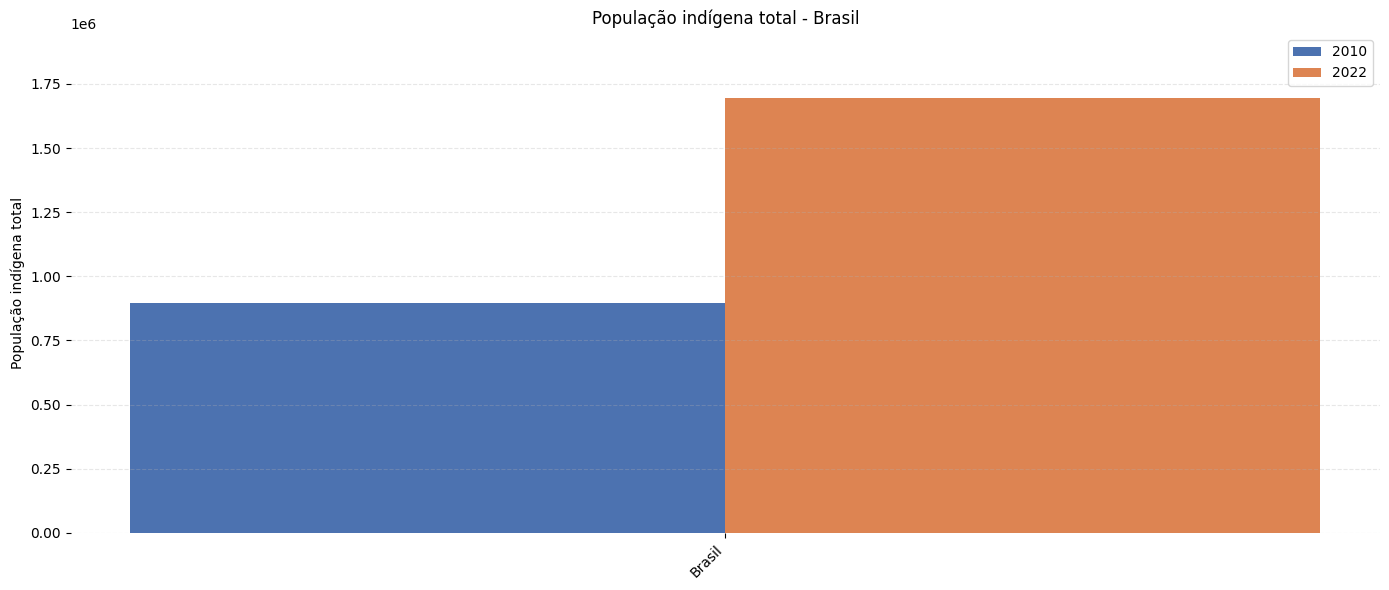

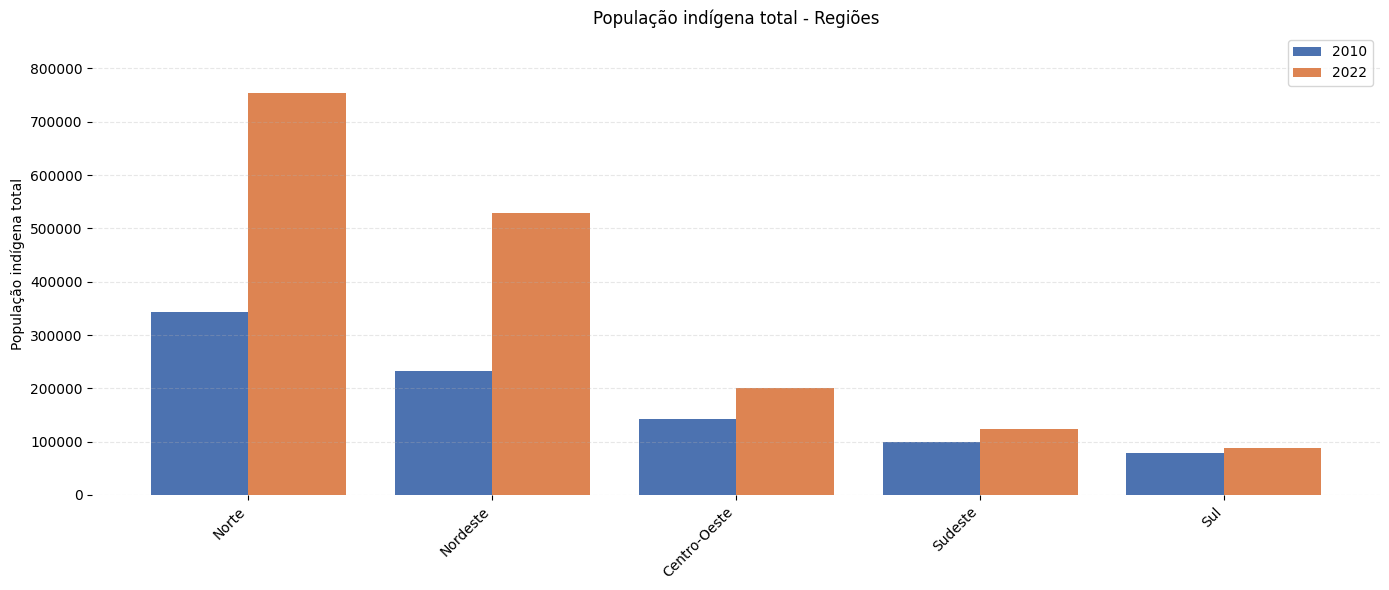

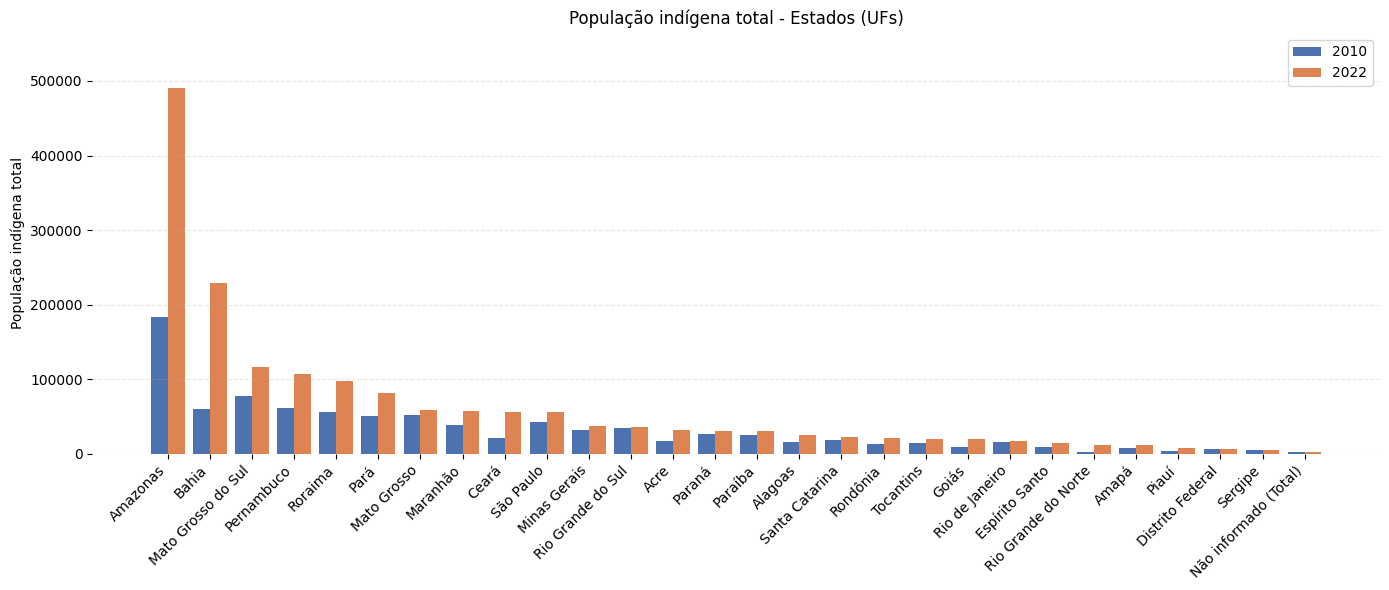

In [ ]:
plot_populacao_indigena(df_brasil, 'População indígena total - Brasil')
plot_populacao_indigena(df_regioes, 'População indígena total - Regiões')
plot_populacao_indigena(df_estados, 'População indígena total - Estados (UFs)')

## 1. Descrição do Gráfico 1: População Indigena Total no Brasil - Comparativo 2010 × 2022

O gráfico acima apresenta uma comparação direta entre a população indígena total registrada nos anos de **2010** (barra azul) e **2022** (barra laranja) em todo o Brasil.

---

### 📈 Principais Observações:

- **Crescimento Expressivo em Valores Absolutos**:  
A barra de 2022 mostra claramente um aumento significativo no total da população indígena em comparação com 2010.

- **Quase Dobro da População**:  
Visualmente, a população indígena em 2022 praticamente dobrou em relação a 2010, o que confirma o que já tínhamos visto nos cálculos de média e máximo.

- **Estados com Maior Crescimento**:  
Embora o gráfico atual mostre o total agregado (nível Brasil), quando olharmos os próximos gráficos por estado (ou região), vale a pena prestar atenção nos locais com maior salto entre as barras azul e laranja.

---

### 🧭 Interpretação:

Esse crescimento pode refletir:

✅ Melhoria na metodologia de contagem do IBGE entre os dois censos  
✅ Maior autorreconhecimento da população indígena nas pesquisas  
✅ Crescimento populacional natural  
✅ Maior visibilidade e inclusão social dessas comunidades


## 2. Descrição do Gráfico 2: População Indígena Total por Região - Comparativo 2010 × 2022

Este gráfico compara o total da população indígena em cada uma das **cinco grandes regiões do Brasil** entre os anos de **2010** e **2022**.

---

### 📈 Principais Observações:

#### 🟢 Região Norte:
- Continua sendo a região com a **maior concentração de população indígena**.
- Saltou de aproximadamente **350 mil em 2010** para **mais de 750 mil em 2022**.
- **Crescimento absoluto mais expressivo** entre todas as regiões.

#### 🟠 Região Nordeste:
- Também apresentou um **grande salto**, passando de **cerca de 230 mil para mais de 530 mil**.
- Pode indicar uma **melhora na identificação/autodeclaração indígena** ou crescimento populacional real.

#### 🔵 Região Centro-Oeste:
- Aumentou de **aproximadamente 140 mil** para **200 mil**.
- Crescimento mais moderado, mas ainda relevante.

#### 🟣 Região Sudeste:
- Pequeno aumento: de **quase 100 mil para cerca de 120 mil**.
- Apesar do crescimento menor, a região segue com um número considerável.

#### 🟤 Região Sul:
- Foi a que teve o **menor crescimento em números absolutos**.
- Saltou de aproximadamente **80 mil para pouco mais de 90 mil**.

---

### 🧠 Interpretação:

- O **Norte e o Nordeste** se destacam como as regiões que mais contribuíram para o aumento geral da população indígena no Brasil nesse período.
- Esse crescimento pode refletir:
  - **Aumento de autodeclaração indígena nas pesquisas**
  - **Revisões na metodologia do IBGE**
  - **Crescimento natural da população**
  - Ou ainda uma combinação desses fatores.

---

## 3. Descrição do Gráfico 3: População Indígena Total por Estado (UF) - Comparativo 2010 × 2022

Este gráfico mostra a comparação da população indígena total entre os anos de **2010** (barra azul) e **2022** (barra laranja) em cada **estado brasileiro** (UF), incluindo o **Distrito Federal** e a categoria "**Não informado (Total)**".

---

### 📈 Principais Observações:

#### 🥇 **Bahia:**
- Em 2022, o Amazonas assumiu a liderança com a **maior população indígena declarada do Brasil**, ultrapassando **490 mil pessoas**.
- Em 2010, o Amazonas era o estado com maior população indígena.
- O número estava próximo de **190 mil** em 2010, mostrando um **crescimento muito expressivo**.

#### 🥈 **Bahia:**
- Em 2022, a Bahia assumiu a segunda posição sendo o segundo estado com a **maior população indígena declarada do Brasil**, tendo um aumento muito expressivo em comparação com 2010.


#### 🥉 **Mato Grosso do Sul:**
- Forte crescimento também, saltando de **~70 mil** para mais de **230 mil em 2022**.

---

### 🏅 Outros Estados com Crescimento Relevante:

- **Pernambuco**, **Roraima**, **Pará**, **Mato Grosso**, **Maranhão** e **Ceará** também apresentaram **saltos consideráveis** entre os dois períodos.
- Muitos estados do **Sudeste e Sul** tiveram **crescimentos menores em números absolutos**, mas ainda assim mostram um aumento proporcional.

---

### 🔎 Análises Interessantes:

- O crescimento **não foi homogêneo**. Estados como **Amazona**, **Bahia** e **Mato Grosso do Sul** tiveram aumentos muito maiores que a média nacional.
- Pode haver influência de fatores como:
  - **Revisão de metodologia de contagem**
  - **Maior reconhecimento/autodeclaração**
  - **Políticas afirmativas e maior visibilidade dos povos indígenas**

---

# Número de indígenas dentro e fora de Terras Indígenas (2022)


In [ ]:
db[['Indígenas 2022 TI Total', 'Indígenas 2022 Fora TI Total']].describe()

,Indígenas 2022 TI Total,Indígenas 2022 Fora TI Total
count,31.000000,3.300000e+01
mean,60275.225806,9.745382e+04
std,122318.880874,2.081212e+05
min,114.000000,3.481000e+03
25%,9187.000000,1.109600e+04
50%,17211.000000,1.917300e+04
75%,43497.000000,5.115200e+04
max,622844.000000,1.071992e+06



## 📋 Descrição dos Dados

| Estatística        | Indígenas em Terras Indígenas (TI) | Indígenas Fora de TI |
|--------------------|------------------------------------|----------------------|
| **count (nº de localidades)** | 31               | 33                   |
| **mean (média)**   | 60.275 pessoas                    | 97.453 pessoas       |
| **std (desvio padrão)** | 122.318                      | 208.112             |
| **min (mínimo)**   | 114 pessoas                      | 3.481 pessoas        |
| **25% (1º quartil)** | 9.187                           | 11.096              |
| **50% (mediana)**  | 17.211 pessoas                   | 19.173              |
| **75% (3º quartil)** | 43.497                          | 51.152              |
| **max (máximo)**   | 622.844 pessoas                  | 1.071.992 (!)        |

---

### 📈 Principais Observações:

#### 🟢 Indígenas Dentro de Terras Indígenas (TI):
- Média de **~60 mil pessoas por localidade** vivendo dentro de TIs.
- A mediana é **~17 mil**, mostrando que a distribuição é **puxada pra cima por poucos locais com muitos habitantes indígenas em TIs**.
- O **máximo (622 mil)** sugere que alguns estados concentram grandes populações indígenas em Terras Indígenas.

#### 🟠 Indígenas Fora de Terras Indígenas:
- **Média de quase 97 mil**, mas com um **desvio padrão muito alto (~208 mil)**, indicando grande variabilidade entre os estados.
- **O máximo fora de TI (1.071.992)** indica que existe pelo menos um estado com mais de **1 milhão de indígenas fora de Terras Indígenas**, o que é um valor surpreendente.
- A **mediana é de ~19 mil**, o que reforça a ideia de concentração em poucos locais.

---

### 🔎 Interpretação Inicial:

- Existe uma **grande dispersão dos indígenas fora de Terras Indígenas**, com forte concentração em alguns estados.
- Em muitos locais, a população fora de TI é **maior do que dentro das TIs**, o que pode refletir:
  - Processos de urbanização  
  - Migração por motivos socioeconômicos  
  - Mudanças culturais ou busca por oportunidades em centros urbanos  

---



- Barras lado a lado (não empilhadas) destacando a população dentro de TI (azul) e fora de TI (amarelo).
- Isso ajuda a entender onde há maior concentração de indígenas em territórios reconhecidos.

### Função Plotar Gráfico

In [ ]:
def plot_populacao_territorio(df, titulo):
    dados = df[['Localidade', 'Indígenas 2022 TI Total', 'Indígenas 2022 Fora TI Total']].copy()
    dados = dados[dados['Localidade'] != 'Não informado']
    dados = dados.set_index('Localidade')

    fig, ax = plt.subplots(figsize=(14,7))

    cores = ['#2E86AB', '#F6AA1C']

    dados.plot(kind='bar', stacked=False, color=cores, edgecolor='gray', linewidth=0.8, ax=ax)

    ax.set_title(titulo, fontsize=18, weight='bold', pad=20)
    ax.set_ylabel('Número de pessoas', fontsize=14)
    ax.set_xlabel('Localidade', fontsize=14)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

    leg = ax.legend(title='Localização', fontsize=12, title_fontsize=14)
    leg.get_frame().set_alpha(0.9)

    plt.tight_layout()
    plt.show()

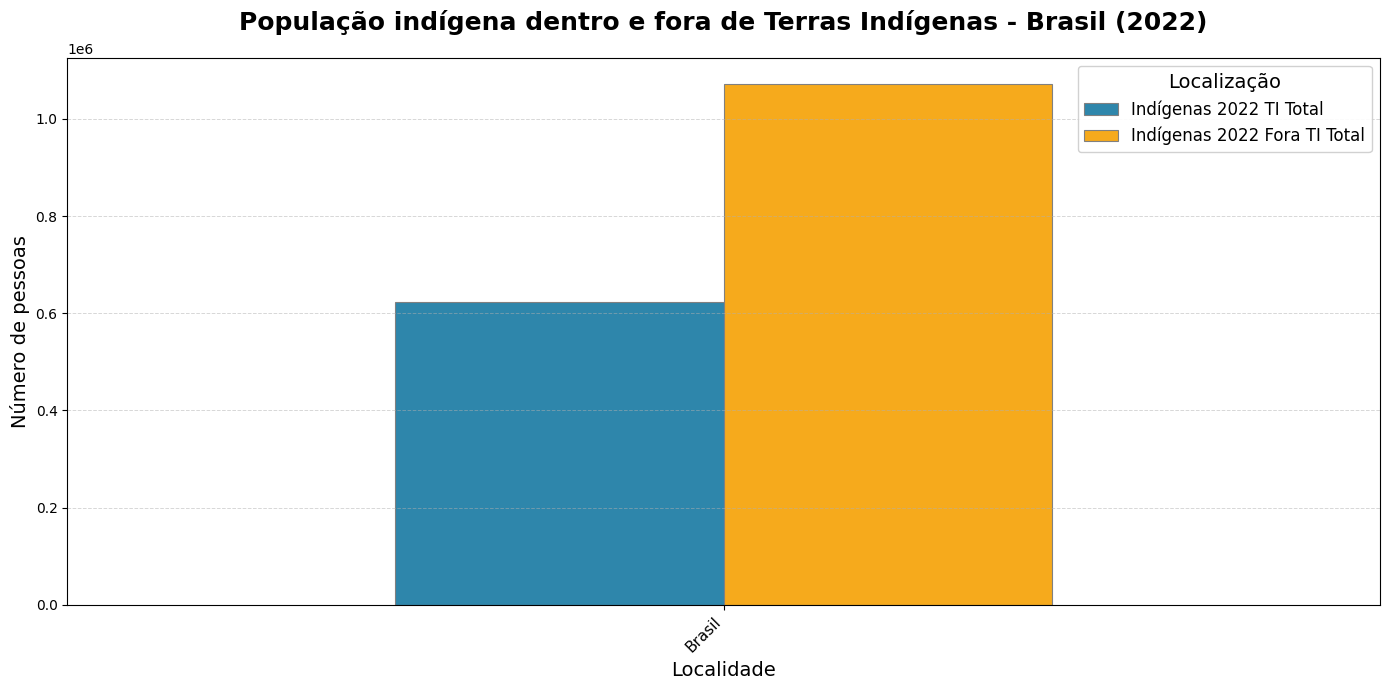

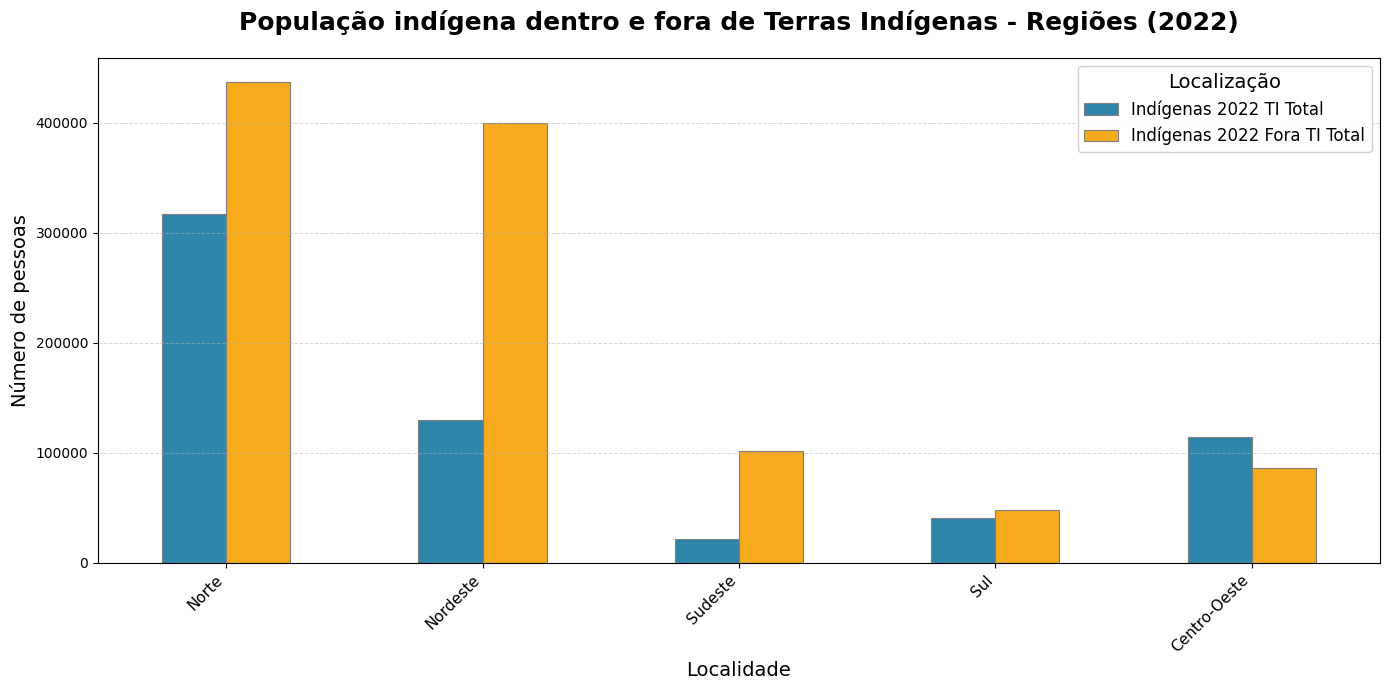

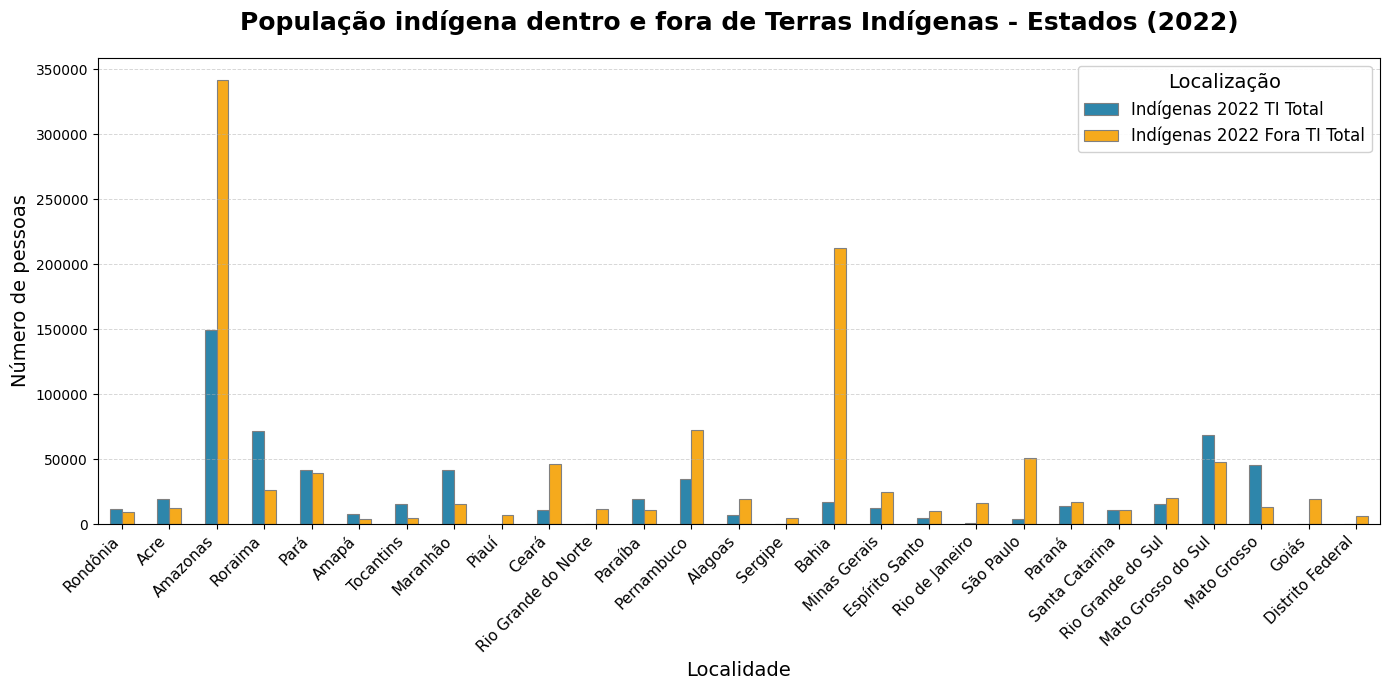

In [ ]:
plot_populacao_territorio(df_brasil, 'População indígena dentro e fora de Terras Indígenas - Brasil (2022)')
plot_populacao_territorio(df_regioes, 'População indígena dentro e fora de Terras Indígenas - Regiões (2022)')
plot_populacao_territorio(df_estados, 'População indígena dentro e fora de Terras Indígenas - Estados (2022)')

## 📊 Gráfico 1: Comparativo Nacional - População Indígenas Dentro × Fora de Terras Indígenas (2022)

### 📍 Visão Geral:

O gráfico mostra o total absoluto de pessoas indígenas vivendo:

- **Dentro das Terras Indígenas (TIs)**: Cerca de **620 mil pessoas**
- **Fora das Terras Indígenas**: Aproximadamente **1,07 milhão de pessoas**

---

### 📈 Análise Rápida:

- A **população fora de TIs já supera a população dentro das TIs**, mostrando um movimento de dispersão.
- Isso pode indicar:
  - **Urbanização crescente**
  - Migração por questões sociais, econômicas ou culturais
  - Mudanças na forma como os indígenas se autodeclaram e onde vivem

---

### 🔍 Destaques:

| Categoria | Total Aproximado |
|----------|----------------|
| **Indígenas em TIs** | ~622.844 pessoas |
| **Indígenas fora de TIs** | ~1.071.992 pessoas |

> Ou seja: **apenas 37%** da população indígena total no Brasil em 2022 estava dentro de Terras Indígenas.

---

## 📊 Gráfico 2: Comparativo Regional - População Indígena Dentro × Fora de Terras Indígenas (2022)

### 📍 Visão Regional:

O gráfico mostra como a população indígena está distribuída **dentro e fora das Terras Indígenas (TIs)** em cada uma das 5 regiões do Brasil.

---

### 📈 Análise Rápida por Região:

| Região | População em TIs | População Fora das TIs | Observação |
|------|------|------|------|
| **Norte** | ~320 mil | ~440 mil | Ainda é a região com maior concentração indígena em TIs |
| **Nordeste** | ~130 mil | ~400 mil | Forte presença indígena fora de TIs |
| **Centro-Oeste** | ~110 mil | ~85 mil | Única região onde o número dentro de TIs ainda supera o de fora |
| **Sudeste** | ~20 mil | ~100 mil | Urbanização forte, com concentração fora de TIs |
| **Sul** | ~40 mil | ~50 mil | Equilíbrio um pouco maior, mas com maioria fora de TIs |

---

### 🔍 Principais Insights:

- **Norte** ainda concentra a maior população indígena dentro de TIs.
- **Nordeste e Sudeste** se destacam por uma **grande população fora das TIs**, mostrando forte urbanização ou dispersão em áreas não demarcadas.
- O **Centro-Oeste** é a única exceção, com mais indígenas dentro das TIs que fora.

---

## 📊 Gráfico 3: Comparativo Estadual - População Indígena Dentro × Fora de Terras Indígenas (2022)

### 📍 Visão por Unidade Federativa:

O gráfico apresenta a distribuição da população indígena **dentro e fora das Terras Indígenas (TIs)** em cada estado brasileiro, com destaque para grandes contrastes regionais.

---

### 📈 Análise Rápida por Estado (Destaques):

| Estado                 | População em TIs (estim.) | População Fora das TIs (estim.) | Observação |
|------------------------|---------------------------|----------------------------------|------------|
| **Amazonas**           | ~150 mil                  | ~340 mil                         | Estado com maior população indígena fora de TIs |
| **Roraima**            | ~70 mil                   | ~30 mil                          | Um dos poucos onde a maioria ainda vive em TIs |
| **Bahia**              | ~20 mil                   | ~210 mil                         | Forte concentração fora de TIs |
| **Mato Grosso do Sul** | ~70 mil                   | ~45 mil                          | População indígena ainda majoritariamente em TIs |
| **Pará**               | ~40 mil                   | ~40 mil                          | População dividida de forma quase igual |
| **Pernambuco**         | ~30 mil                   | ~70 mil                          | População indígena majoritariamente fora de TIs |
| **São Paulo**          | ~5 mil                    | ~20 mil                          | Quadro urbano com baixa presença em TIs |
| **Distrito Federal**   | ~1 mil                    | ~6 mil                           | Concentração quase exclusiva fora das TIs |

---

### 🔍 Principais Insights:

- **Amazonas** lidera tanto em população indígena total quanto em indígenas fora de TIs.
- **Bahia** e **Pernambuco** evidenciam a urbanização ou dispersão em áreas não demarcadas.
- **Roraima** e **Mato Grosso do Sul** ainda preservam uma **maioria indígena vivendo dentro de TIs**.
- Estados do **Sudeste e Sul**, como São Paulo e Paraná, mostram baixa presença de TIs, com maior urbanização indígena.

---


# 🔎 Conclusão Final da Análise Explorátoria

- A população indígena cresceu em quase todas as localizações entre 2010 e 2022, com destaque para **Amazonas** e **Bahia**, que apresentam os maiores contingentes fora das Terras Indígenas.
- Observa-se uma tendência de **urbanização**, com mais indígenas residindo em áreas urbanas; porém, essa evolução não é homogênea — estados como **Roraima** e **Mato Grosso do Sul** ainda mantêm significativa presença indígena em TIs.
- A distribuição dentro e fora de Terras Indígenas revela desafios territoriais — em **estados do Nordeste e Sudeste**, como **Pernambuco**, **Minas Gerais** e **São Paulo**, há forte concentração fora das TIs, indicando ausência ou insuficiência de territórios demarcados.



# Observação

Os dados apresentados aqui não foram totalmente limpos nem organizados para realizar todos os tipos de análises possíveis, devido à minha falta de tempo.

Contudo, pretendo realizar uma análise completa futuramente, que ficará disponível no meu repositório do GitHub para consulta livre:  
[exploracao-dados-indigenas-2010-2022](https://github.com/LUCASDNORONHA/exploracao-dados-indigenas-2010-2022)
